In [2]:
import matplotlib.pyplot as plt

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time

from astroplan import observability_table
from astroplan import AltitudeConstraint, MoonSeparationConstraint, SunSeparationConstraint
from astroplan.plots import plot_airmass
from astroplan.plots import plot_sky
from astroplan import Observer, FixedTarget, time_grid_from_range

import warnings
warnings.filterwarnings("ignore")

from astroplan import download_IERS_A
download_IERS_A()

In [3]:
APO = Observer.at_site('APO')

obsDate1 = Time("2023-04-17")
obsDate2 = Time("2023-5-1")
wk1Noon = APO.noon(obsDate1, which = "nearest")
wk2Noon = APO.noon(obsDate2, which = "nearest")

wk1ObsTime = APO.tonight(wk1Noon, horizon = -18 * u.deg)
wk2ObsTime = APO.tonight(wk2Noon, horizon = -18 * u.deg)


targetM82 = FixedTarget.from_name("M82")
targetM81 = FixedTarget.from_name("M81")
targetNGC2403 = FixedTarget.from_name("ngc2403")
targetNGC2366 = FixedTarget.from_name("ngc2366")
targetNGC3077 = FixedTarget.from_name("ngc3077")
targetNGC2976 = FixedTarget.from_name("ngc2976")
targetNGC4236 = FixedTarget.from_name("ngc4236")
targetList = [targetM82, targetM81, targetNGC2403, targetNGC2366, targetNGC3077, targetNGC2976, targetNGC4236]
targetWEIRD = [targetNGC2403, targetNGC2366]

In [12]:
targetM82

<FixedTarget "M82" at SkyCoord (ICRS): (ra, dec) in deg (148.9684583, 69.6797028)>

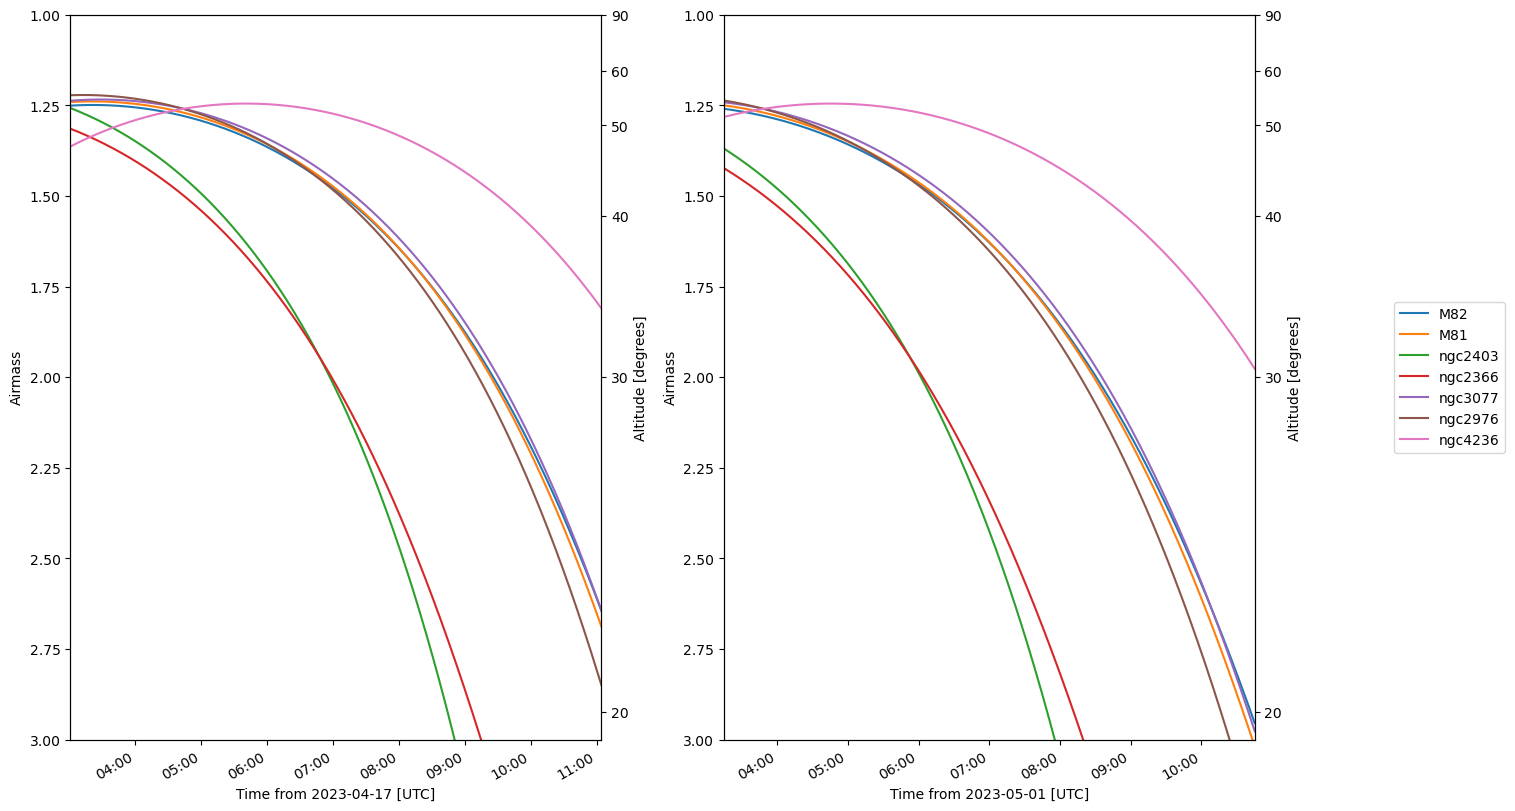

In [8]:
fig, ax = plt.subplot_mosaic(
    '''
    AB
    ''',
    figsize = (15, 8),
    constrained_laout = True
)

timeGridwk1 = time_grid_from_range(wk1ObsTime, time_resolution = 0.01 * u.h)
timeGridwk2 = time_grid_from_range(wk2ObsTime, time_resolution = 0.01 * u.h)
for target in targetList:
    plt.sca(ax['A'])
    plot_airmass(target, APO, timeGridwk1, altitude_yaxis = True)
    plt.sca(ax['B'])
    plot_airmass(target, APO, timeGridwk2, altitude_yaxis = True)
plt.legend(loc = 'center left', bbox_to_anchor=(1.25,0.5));

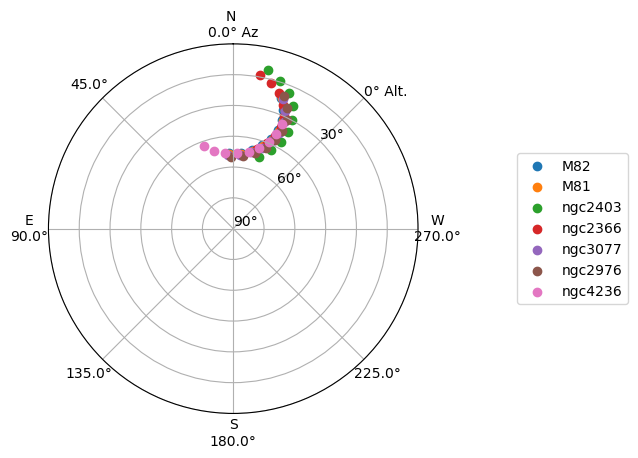

In [9]:
obsTart = Time(wk1ObsTime[0].iso)
obsRange = time_grid_from_range(wk1ObsTime, time_resolution = 1 * u.h)
for target in targetList:
    plot_sky(target, APO,obsRange)
    
plt.legend(loc = 'center left', bbox_to_anchor=(1.25,0.5));

In [10]:
constraints = [MoonSeparationConstraint(60 * u.deg), AltitudeConstraint(min=27*u.deg, max = 80 * u.deg)]

In [11]:
obsTable = observability_table(constraints, APO, targetList, time_range = wk1ObsTime)
obsTable

target name,ever observable,always observable,fraction of time observable
str7,bool,bool,float64
M82,True,False,0.8823529411764706
M81,True,False,0.8235294117647058
ngc2403,True,False,0.5294117647058824
ngc2366,True,False,0.5882352941176471
ngc3077,True,False,0.8823529411764706
ngc2976,True,False,0.8235294117647058
ngc4236,True,True,1.0


In [8]:
MRO = Observer.at_site('MRO')

obsDate = Time("2023-07-28")
noon = MRO.noon(obsDate, which = "nearest")

obsTime = MRO.tonight(noon, horizon = -18 * u.deg)
timeGrid = time_grid_from_range(obsTime, time_resolution = 0.1 * u.h)

In [6]:
targetPQCam = FixedTarget.from_name("PQ Cam")

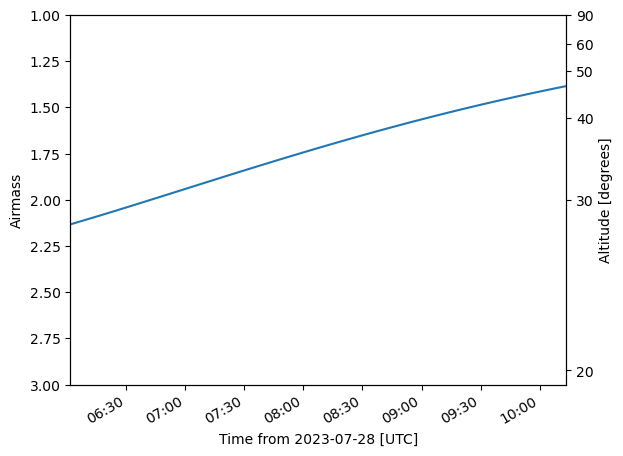

In [13]:
plot_airmass(targetPQCam, MRO, timeGrid, altitude_yaxis = True);

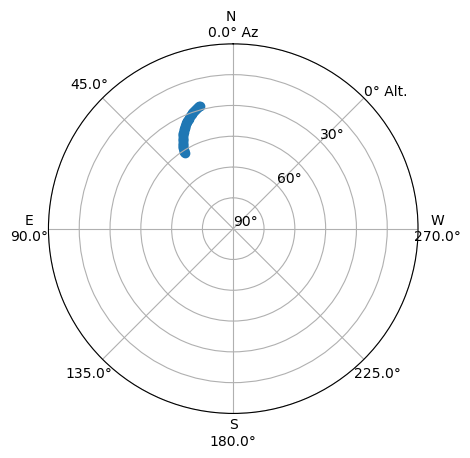

In [14]:
plot_sky(targetPQCam, MRO, timeGrid);